In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")


IMPORTING DATA SET

In [2]:
netflix = pd.read_csv('netflix_data.csv')

In [25]:
#DISPLAYING FIRST 5 ROWS OF DATASET
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,Tv Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,123,A brilliant group of students become card-coun...,Dramas


HANDLING MISSING VALUES

In [26]:
#COUNTING FOR NUMBER OF MISSING OR NULL VALUES
netflix.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      98
release_year     0
duration         0
description      0
genre            0
dtype: int64

In [27]:
#FILLING NULL VALUE WITH GENERIC TERMS
netflix['director'].fillna('Unknown', inplace = True)
netflix['cast'].fillna('Unknown', inplace = True)
netflix['country'].fillna('Unknown', inplace = True)
netflix['date_added'] = pd.to_datetime(netflix['date_added'], errors='coerce')

In [22]:
netflix.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      98
release_year     0
duration         0
description      0
genre            0
dtype: int64

In [ ]:
netflix.duplicated().sum()


In [23]:
#Normalizing Categorical Values
netflix['type'] = netflix['type'].str.strip().str.title()

In [4]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')

In [24]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      7787 non-null   object        
 4   cast          7787 non-null   object        
 5   country       7787 non-null   object        
 6   date_added    7689 non-null   datetime64[ns]
 7   release_year  7787 non-null   int32         
 8   duration      7787 non-null   int64         
 9   description   7787 non-null   object        
 10  genre         7787 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(8)
memory usage: 638.9+ KB


TREND ANALYSIS

In [39]:
#COUNTING THE NUMBER OF RELEASES YEARLY
yearly_release = netflix['release_year'].value_counts().sort_index()
yearly_release.tail(35)

release_year
1987       7
1988      16
1989      13
1990      20
1991      17
1992      18
1993      22
1994      16
1995      19
1996      19
1997      30
1998      31
1999      33
2000      34
2001      36
2002      45
2003      49
2004      59
2005      73
2006      85
2007      85
2008     125
2009     137
2010     173
2011     166
2012     219
2013     267
2014     334
2015     541
2016     882
2017    1012
2018    1121
2019     996
2020     868
2021      31
Name: count, dtype: int64

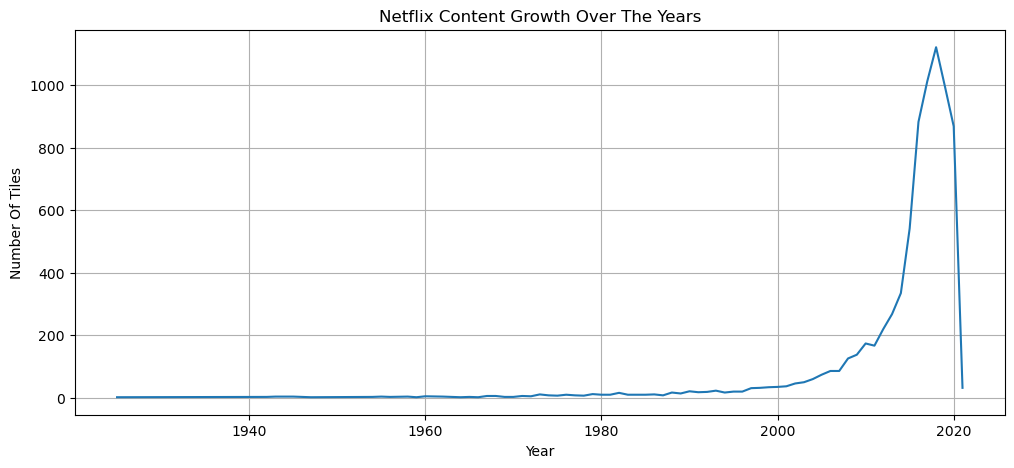

In [40]:
#VISUALIZING CONTENT GROWTH OVER THE YEARS

plt.figure(figsize = (12,5))
plt.plot(yearly_release.index, yearly_release.values, linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number Of Tiles')
plt.title('Netflix Content Growth Over The Years')
plt.grid()
plt.show()

DURATION INSIGHTS

In [61]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')

In [69]:
#SUBSETTING FOR JUST TYPES AND DURATION
show_runtime = netflix[['type', 'duration']]
show_runtime.columns = ['type', 'duration']
show_runtime

,type,duration
0,Tv Show,4
1,Movie,93
2,Movie,78
3,Movie,80
4,Movie,123
...,...,...
7782,Movie,99
7783,Movie,111
7784,Movie,44
7785,Tv Show,1


In [76]:
#CALCULATING AVERAGE RUTIME OF BOTH TYPES
avg_runtime = show_runtime.groupby('type')['duration'].agg(['mean', 'median'])
avg_runtime

,mean,median
type,,
Movie,99.307978,98.0
Tv Show,1.775934,1.0


In [77]:
norm_runtimes = show_runtime[(show_runtime['duration'] >1.8) & (show_runtime['duration']<100)]
norm_runtimes

,type,duration
0,Tv Show,4
1,Movie,93
2,Movie,78
3,Movie,80
6,Movie,95
...,...,...
7780,Movie,94
7781,Movie,88
7782,Movie,99
7784,Movie,44


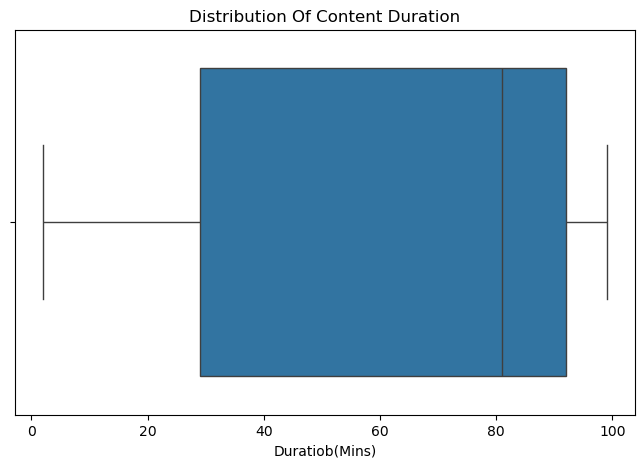

In [78]:
plt.figure(figsize = (8,5))
sns.boxplot(x=norm_runtimes['duration'])
plt.xlabel('Duratiob(Mins)')
plt.title('Distribution Of Content Duration')
plt.show()